# Convolutional Neural Networks

# Case Study | Image Classification with MNIST

## 1. Downloading the MNIST Data

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

(x_train,y_train),(x_test,y_test)=tfds.as_numpy(tfds.load('mnist',split=['train', 'test'], 
                                                          batch_size=-1, #all data in single batch
                                                          as_supervised=True, #only input and label
                                                          shuffle_files=True #shuffle data to randomize
                                                         ))


The digit in the image: 3


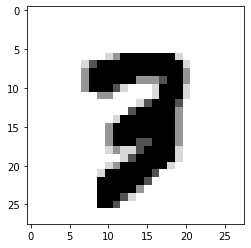

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

img_index = 7777 #You may pick a number up to 60,000
print("The digit in the image:", y_train[img_index])
plt.imshow(x_train[img_index].reshape(28,28),cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28, 1)

## 2. Reshaping and Normalizing the Images

In [4]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the grayscale RGB codes by dividing it to the "max minus min grayscale RGB value".
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## 3. Building the Convolutional Neural Network

In [7]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

#Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #Flattening the 2D arrays for fully connected layers
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

## 4. Compiling and Fitting the Model

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.3702 - accuracy: 0.8860
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0965 - accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0637 - accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0317 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0172 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

## 5. Evaluating the Model

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0571 - accuracy: 0.9864


[0.05709945037961006, 0.9864000082015991]

Our CNN model predicts that the digit in the image is: 5


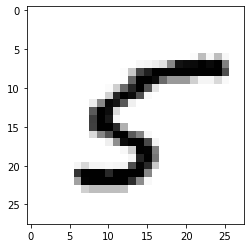

In [10]:
# We can also make individual predictions with the following code:
img_pred_index = 1000
plt.imshow(x_test[img_pred_index].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[img_pred_index].reshape(1,28,28,1))
print("Our CNN model predicts that the digit in the image is:",pred.argmax())

## 6. Saving the Trained Model

In [12]:
# Save the entire model as a SavedModel.
# Create a 'saved_model' folder under the 'content' folder of your Google Colab Directory.
# Save the full model with its variables, weights, and biases.
model.save('saved_model/digit_classifier')

INFO:tensorflow:Assets written to: saved_model/digit_classifier\assets


INFO:tensorflow:Assets written to: saved_model/digit_classifier\assets
